grade=85/100

# Lab 6 

##Abstract and Introduction

In lab 6, we are calibrating spectrum that we recieve. The spectrum of an object is the flux of the light per unit wavelength. When the object emitting light is glowing due to hot gas (or absorbing due to cool gas), the locations of spectral lines are signatures of the elements contained in the gas. In the raw spectra we recieve, there are certain impurities that look like emission lines, which we can distinuguish by their shape, as they have no width unlike the emissions we want from the elements. So this lab, we worked to remove the impurities, and get a refined spectra that we can analyze!

In [9]:
import numpy as np
%matplotlib inline
import sys 
from scipy.optimize import curve_fit 
import matplotlib.pylab as plt
from astropy.io import fits

In [10]:
root = '/Users/eksgreen/Desktop/lab6/'
Spectra = []
for i in range(1,6):
    Spectra.append(np.float64(fits.getdata(root + 'Spectra' + str(i) + '.fit')))

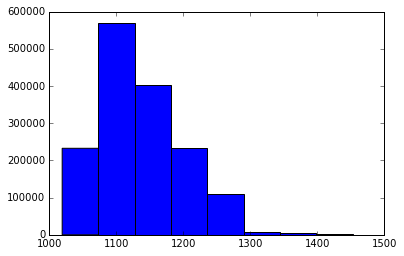

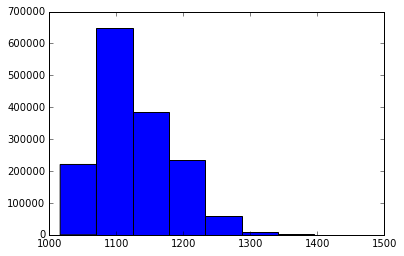

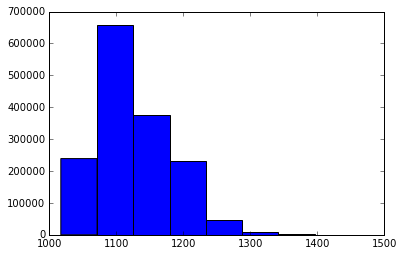

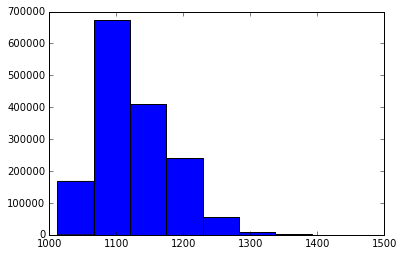

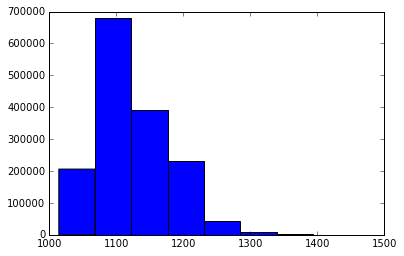

In [11]:
plt.figure(1)
plt.hist(Spectra[0].flatten(),bins=1000)
plt.xlim(1000,1500)

plt.figure(2)
plt.hist(Spectra[1].flatten(),bins=1000)
plt.xlim(1000,1500)

plt.figure(3)
plt.hist(Spectra[2].flatten(),bins=1000)
plt.xlim(1000,1500)

plt.figure(4)
plt.hist(Spectra[3].flatten(),bins=1000)
plt.xlim(1000,1500)

plt.figure(5)
plt.hist(Spectra[4].flatten(),bins=1000)
plt.xlim(1000,1500)
plt.show()

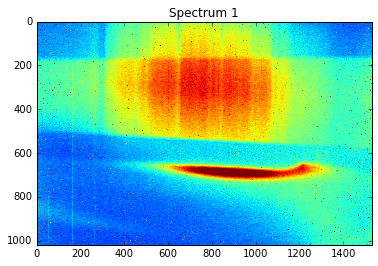

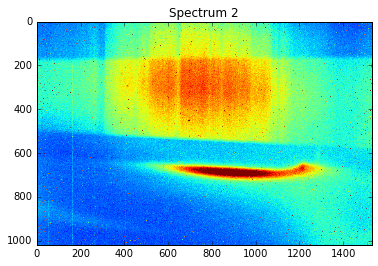

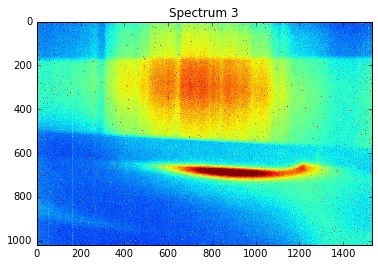

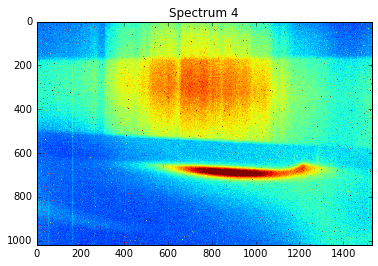

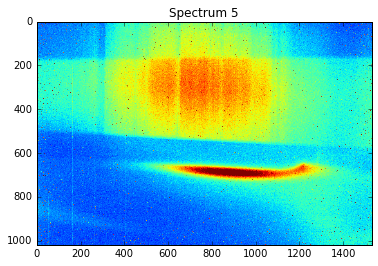

In [12]:
plt.figure(1)
plt.imshow(Spectra[0],vmin=1000,vmax=1300)
plt.title('Spectrum 1')

plt.figure(2)
plt.imshow(Spectra[1],vmin=1000,vmax=1300)
plt.title('Spectrum 2')

plt.figure(3)
plt.imshow(Spectra[2],vmin=1000,vmax=1300)
plt.title('Spectrum 3')

plt.figure(4)
plt.imshow(Spectra[3],vmin=1000,vmax=1300)
plt.title('Spectrum 4')

plt.figure(5)
plt.imshow(Spectra[4],vmin=1000,vmax=1300)
plt.title('Spectrum 5')

Here, is our flattened spectra from the first spectra above.

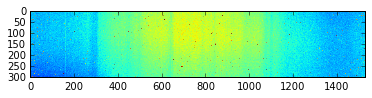

In [13]:
SubSpectra = []
SubSpectra = Spectra[1][200:500,:]

plt.imshow(SubSpectra, vmin=1000,vmax=1400)
plt.figure()

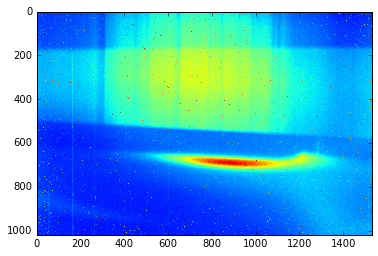

In [14]:
avgspectra = (Spectra[1] + Spectra[2] + Spectra[3] + Spectra[4])/4.
plt.imshow(avgspectra, vmin=1000,vmax=1400)

In the two windows below, we average and flatten the spectra so we can make it one dimensional, and in the form that we are used to! We went through each psuedo emmission line in the CFL, which is the graph we used for the calibrting, and once we identified their location, went and corrected it in the solar spectra fromand made them equal to the one directly next to it to get it smoother. Once the spectra started to look how it should, I compared it to a similar solar spectra, and put lines marking where specific element spectra should be (as marked on the graphs) in wavelengths. We then stretched and shifted both to translate it to fit where the elemental benchmarks should be. 

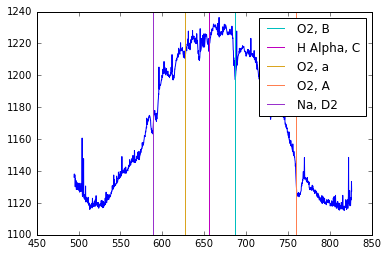

In [140]:
SunSpectra = np.zeros(1530)
for i in range(200,500):
    SunSpectra1 = avgspectra[i,:]
    SunSpectra = SunSpectra + SunSpectra1
SunSpectra = SunSpectra/300.

SunSpectra[402]=SunSpectra[403]
SunSpectra[415]=SunSpectra[416]
SunSpectra[599]=SunSpectra[600]
SunSpectra[598]=SunSpectra[597]
SunSpectra[588]=SunSpectra[589]
SunSpectra[1476]=SunSpectra[1476]
SunSpectra[645]=SunSpectra[646]
SunSpectra[1503]=SunSpectra[1504]
SunSpectra[218]=SunSpectra[219]
SunSpectra[161]=SunSpectra[163] #161 and 162?
SunSpectra[332]=SunSpectra[333]


xvec_sun = np.arange(1530) #flipping the plot to match to spectra
xvec_sun = xvec_sun[::-1]
xvec_sun = xvec_sun*.217+494.5


plt.plot(xvec_sun,SunSpectra)
plt.axvline(759.370, color = 'coral', label = 'O2, A')
plt.axvline(686.7, color = 'c', label = 'O2, B')
plt.axvline(656.28, color = 'm', label = 'H Alpha, C')
plt.axvline(627.66, color = 'goldenrod', label = 'O2, a')

plt.axvline(588.99, color = 'darkorchid', label = 'Na, D2')
588.99

plt.legend()
plt.show()

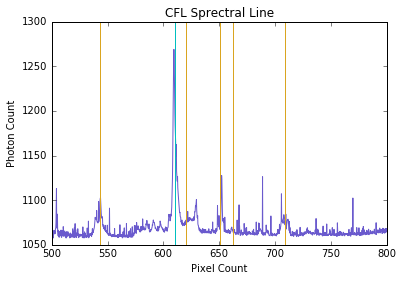

In [120]:
CFL = np.float64(fits.getdata(root + 'CFL.fit'))

CFL_Line = np.zeros(1530)
for i in range(200,400):
    CFL_Line1 = CFL[i,:]
    CFL_Line = CFL_Line + CFL_Line1
CFL_Line = CFL_Line/200.

CFL_Line[402]=CFL_Line[403]
CFL_Line[415]=CFL_Line[416]
CFL_Line[599]=CFL_Line[598]
CFL_Line[588]=CFL_Line[589]
CFL_Line[1476]=CFL_Line[1476]
CFL_Line[645]=CFL_Line[646]
CFL_Line[1503]=CFL_Line[1504]
CFL_Line[218]=CFL_Line[219]
CFL_Line[161]=CFL_Line[162]
CFL_Line[332]=CFL_Line[333]

xvec = np.arange(1530) #flipping the plot to match to spectra
xvec = xvec[::-1]
xvec = xvec*.217+494.5
plt.plot(xvec,CFL_Line, color = 'slateblue')
#plt.plot(np.arange(1530),CFL_Line)
plt.axvline(365., color = 'goldenrod')
plt.axvline(543., color = 'goldenrod')
plt.axvline(662.6, color = 'goldenrod')
plt.axvline(435.8, color = 'goldenrod')
plt.axvline(610.8, color = 'c') #big one
plt.axvline(650.4, color = 'goldenrod')
plt.axvline(709., color = 'goldenrod')
plt.axvline(620.6, color = 'goldenrod') #these are what we're aiming for, shifting lines and stretching
plt.title('CFL Sprectral Line')
plt.xlabel('Pixel Count')
plt.ylabel('Photon Count')
plt.xlim(500,800)
plt.show()

In [101]:
#for i in range(200,300):
#    if CFL_Line[i] = max(CFL_Line)
#    print CFL_Line

print(CFL_Line[161])
print(CFL_Line[218])
print(CFL_Line[311])
print(CFL_Line[332])
print(CFL_Line[313])

1065.7
1061.28
1064.955
1061.2
1061.435


## Conclusion

As a result, we have a solar spectra that looks how it should! The calibrations were successful (although, since we went and picked each impuritie manually, we could always work on methods to refine it even more in the future) and now the resulting solar spectra can be used to analyze and characterize the star, and others. 